<a href="https://colab.research.google.com/github/blackbudge98-cpu/gt-markets/blob/main/Google_Keywords_as_a_predictive_indicator_of_USD_trading_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google Keywords as a predictive indicator of USD trading performance**

The Project is exploring how Google Trend KeyWord Data can be used in forward validation to determine the probability of a movement in a trading pair.

Our Control Variable will be USD to determine's its performance on the following trading pairs:

*   USD to Chinese Yuan
*   USD to BTC
*   USD to Oil
*   USD to Gold





In [25]:
#Use of the following libaries will assist in providing the project manager with the data

import yfinance as yf
import pandas as pd
from datetime import date

#The first data set we will want to see is USD over a 10 year period

tickers = ["USD", "USDCNY=X","BTC-USD","CL=F", "GC=F"]

#The definition of tickers will assist in a batch query rather than a singular batch query

df = yf.download(tickers, period="10y", interval="1d")["Close"]

#Rename the columns to be more user friendly, and align with our assumptions

df.rename(columns={"CL=F":"USD to Oil","GC=F":"USD to Gold","BTC-USD": "USD to BTC","USDCNY=X": "USD to Chinese Yuan"},inplace=True)

#print headers for 10 rows to see what the data looks like

print(df.head(10))

/tmp/ipython-input-924416535.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, period="10y", interval="1d")["Close"]
[*********************100%***********************]  5 of 5 completed

Ticker      USD to BTC  USD to Oil  USD to Gold       USD  USD to Chinese Yuan
Date                                                                          
2015-08-29  229.779999         NaN          NaN       NaN                  NaN
2015-08-30  228.761002         NaN          NaN       NaN                  NaN
2015-08-31  230.056000   49.200001  1131.599976  1.390876               6.3785
2015-09-01  228.121002   45.410000  1138.699951  1.281003               6.3664
2015-09-02  229.283997   46.250000  1132.500000  1.341353               6.3545
2015-09-03  227.182999   46.750000  1123.699951  1.383659               6.3459
2015-09-04  230.298004   46.049999  1120.599976  1.345162               6.3459
2015-09-05  235.018997         NaN          NaN       NaN                  NaN
2015-09-06  239.839996         NaN          NaN       NaN                  NaN
2015-09-07  239.847000         NaN          NaN       NaN               6.3459


In [28]:
from google.colab import drive
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import os
from datetime import date

# Authenticate and mount Google Drive
drive.mount('/content/drive')
auth.authenticate_user()
drive_service = build('drive', 'v3')

# Define the folder ID and filename
folder_id = '1tqNeIkQM2IawFLS-NHBzaDl8fsJAo0t_'
today = date.today()
filename = f"financial_data_raw_data_from_yf{today.strftime('%Y-%m-%d')}.csv"
filepath = f"/content/{filename}" # Save locally first

# Save the DataFrame to a temporary local CSV file
df.to_csv(filepath)

# Create a file in the shared drive
file_metadata = {
    'name': filename,
    'parents': [folder_id]
}

media = MediaFileUpload(filepath, mimetype='text/csv')

gfile = drive_service.files().create(
    body=file_metadata,
    media_body=media,
    fields='id'
).execute()

print(f"File ID: {gfile.get('id')}")
print(f"Data exported to shared drive folder: {folder_id}")

# Clean up the local file
os.remove(filepath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ID: 1_-jK0nuGdsQOsZ03lKsePRL_d24gic21
Data exported to shared drive folder: 1tqNeIkQM2IawFLS-NHBzaDl8fsJAo0t_


In [27]:
#Next step is to obtain information on the datatable, and apply pre-processing steps

df.info()

#understand how many numbers of rows are in the dataset
print('\n')
num_rows = len(df)
print(f"Number of rows: {num_rows}")

#the next step is to export the dataset as a csv file to enable a view of the data
from google.colab import drive
import os
drive.mount('/content/drive')

today = date.today()
filename = f"financial_data_raw_data_from_yf{today.strftime('%Y-%m-%d')}.csv"
directory = "/content/drive/Shared drives/1tqNeIkQM2IawFLS-NHBzaDl8fsJAo0t_"
filepath = f"{directory}/{filename}" # Construct the full path

# Create the directory if it doesn't exist - Note: This may not work for shared drives. Ensure the folder exists manually.
# os.makedirs(directory, exist_ok=True) # Commenting out as it might not work for shared drives.

df.to_csv(filepath)

print (f"Data exported to {filepath}")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2015-08-29 to 2025-08-29
Freq: D
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   USD to BTC           3654 non-null   float64
 1   USD to Oil           2515 non-null   float64
 2   USD to Gold          2514 non-null   float64
 3   USD                  2515 non-null   float64
 4   USD to Chinese Yuan  2603 non-null   float64
dtypes: float64(5)
memory usage: 171.3 KB


Number of rows: 3654
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


OSError: Cannot save file into a non-existent directory: '/content/drive/Shared drives/1tqNeIkQM2IawFLS-NHBzaDl8fsJAo0t_'

In [ ]:
print("Blank values in the raw database")
print('\n')

#Identify the number of rows are blank
print(df.isna().sum())

print('\n')
blank_rate = (df.isna().sum() / num_rows) * 100
print("Blank Rate (%):")
print(blank_rate.round(2))

In [ ]:
#After Identifying the blank rate in the original dataframe pre-processing needs to be applied
df_for_pre_processing = df.copy()
df_for_pre_processing['Day of Week'] = df_for_pre_processing.index.day_name()
print (df_for_pre_processing.head(10))

#We know Bitcoin trades all the time, but we want to see if there is any other blanks in the dataset
print('\n')
print("Blank values in the pre-processed database")
print('\n')
missing_values_per_day_of_week = df_for_pre_processing.groupby('Day of Week').apply(lambda g: g.isna().sum().sum())
print(missing_values_per_day_of_week)

In [ ]:
#Therefore in the pre-processing dataset the decision will be made to drop both Saturday and Sunday
df_weekday = df_for_pre_processing.drop(df_for_pre_processing[(df_for_pre_processing['Day of Week'] == 'Saturday') | (df_for_pre_processing['Day of Week'] == 'Sunday')].index)
df_weekday_reordered = df_weekday[['Day of Week', 'USD', 'USD to Chinese Yuan', 'USD to BTC', 'USD to Oil', 'USD to Gold']]
df_weekday_reordered.head(10)

In [ ]:
#Where data is missing the assumption will be to replace in the df_weekday dataframe with the previous value in the dataset
df_weekday_usd = df_weekday.drop(columns=['USD to BTC','USD to Oil','USD to Gold','USD to Chinese Yuan'])
df_weekday_usd_reordered = df_weekday_usd[['Day of Week', 'USD']]
df_weekday_usd_reordered.head(10)

In [ ]:
#Next step is for any NaN is to show the dates
df_weekday_usd_reordered.isna().sum()



In [ ]:
# Show dates where 'USD' is NaN
dates_with_missing_usd = df_weekday_usd_reordered[df_weekday_usd_reordered['USD'].isna()].index
print("Dates with missing 'USD' values:")
print(dates_with_missing_usd)

There are holidays in the United States which are not a set date but rather a day near of. For simplicity of the dataset it will be easier to use the previous close value.

In [ ]:
# Where there is a NaaN going to use the previous day close to populate the value
df_weekday_usd_reordered['USD'] = df_weekday_usd_reordered['USD'].ffill()
df_weekday_usd_reordered.head(10)

In [ ]:
#Now we add a daily change amount, and a percentage daily change to the dataset
df_weekday_usd_reordered['Daily Change'] = df_weekday_usd_reordered['USD'].diff()
df_weekday_usd_reordered['% Daily Change'] = df_weekday_usd_reordered['Daily Change'] / df_weekday_usd_reordered['USD']

# Fill the initial NaN values with 0
df_weekday_usd_reordered['Daily Change'].fillna(0, inplace=True)
df_weekday_usd_reordered['% Daily Change'].fillna(0, inplace=True)

df_weekday_usd_reordered.head(10)

In [29]:
#Export the DF Weekday USD Performance as a CSV File with the First Date - Last Date as the file name
from google.colab import drive
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import os
from datetime import date

# Authenticate and mount Google Drive (if not already mounted)
drive.mount('/content/drive')
auth.authenticate_user()
drive_service = build('drive', 'v3')

# Define the folder ID and filename
folder_id = '1wOqTixtRA5n5uHN1ptfIbQm6suTrLDxA'
today = date.today()
filename = f"financial_data_pre_processed_data_from_yf_{today.strftime('%Y-%m-%d')}.csv" # Changed filename slightly to distinguish
filepath = f"/content/{filename}" # Save locally first

# Save the DataFrame to a temporary local CSV file
df_weekday_usd_reordered.to_csv(filepath)

# Create a file in the shared drive
file_metadata = {
    'name': filename,
    'parents': [folder_id]
}

media = MediaFileUpload(filepath, mimetype='text/csv')

gfile = drive_service.files().create(
    body=file_metadata,
    media_body=media,
    fields='id'
).execute()

print(f"File ID: {gfile.get('id')}")
print(f"Data exported to shared drive folder: {folder_id}")

# Clean up the local file
os.remove(filepath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ID: 1aEAPWO1KSiQvzmt6rB_beotoO2JJtiVH
Data exported to shared drive folder: 1wOqTixtRA5n5uHN1ptfIbQm6suTrLDxA


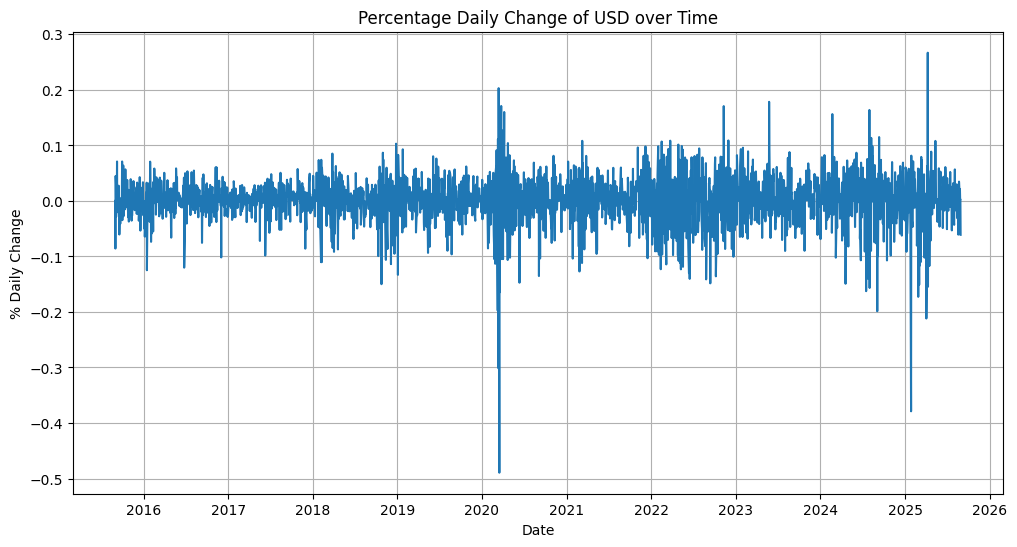

In [31]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_weekday_usd_reordered.index, df_weekday_usd_reordered['% Daily Change'])
plt.title('Percentage Daily Change of USD over Time')
plt.xlabel('Date')
plt.ylabel('% Daily Change')
plt.grid(True)
plt.show()

In [33]:
# Calculate the first and third quartiles for 'Daily Change'
Q1 = df_weekday_usd_reordered['Daily Change'].quantile(0.25)
Q3 = df_weekday_usd_reordered['Daily Change'].quantile(0.75)

# Filter the DataFrame for dates where 'Daily Change' is below Q1 or above Q3
outliers_dates = df_weekday_usd_reordered[(df_weekday_usd_reordered['Daily Change'] < Q1) | (df_weekday_usd_reordered['Daily Change'] > Q3)]

# Print a table of these dates and their corresponding 'Daily Change' values
print("Dates with Daily Change outside of Q1 and Q3:")
display(outliers_dates[['Daily Change']])

Dates with Daily Change outside of Q1 and Q3:


Ticker,Daily Change
Date,
2016-01-15,-0.158177
2016-06-24,-0.199275
2016-09-09,-0.162036
2016-12-01,-0.242148
2017-05-17,-0.236765
...,...
2025-08-22,3.010002
2025-08-25,0.989998
2025-08-26,1.900002


In [36]:
# Print Max and Min Percentage changes and the dates they occured
max_percentage_change = df_weekday_usd_reordered['% Daily Change'].max()
min_percentage_change = df_weekday_usd_reordered['% Daily Change'].min()

date_max_change = df_weekday_usd_reordered['% Daily Change'].idxmax()
date_min_change = df_weekday_usd_reordered['% Daily Change'].idxmin()


print(f"Maximum Percentage Daily Change: {max_percentage_change:.4f}% on {date_max_change.strftime('%Y-%m-%d')}")
print(f"Minimum Percentage Daily Change: {min_percentage_change:.4f}% on {date_min_change.strftime('%Y-%m-%d')}")

Maximum Percentage Daily Change: 0.2670% on 2025-04-09
Minimum Percentage Daily Change: -0.4896% on 2020-03-16


In [39]:
!pip install pytrends

from pytrends.request import TrendReq

# Initialize TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

# Define the keyword and the specific time periods
kw_list = ["USD"]

# Format the dates for pytrends
date_max_change_str = date_max_change.strftime('%Y-%m-%d')
date_min_change_str = date_min_change.strftime('%Y-%m-%d')

# Define the timeframes for the specific dates
# Combine the date range into a single timeframe
timeframe_combined = f'{date_min_change_str} {date_max_change_str}'


print(f"Google Trends data for 'USD' between {date_min_change_str} and {date_max_change_str}:")
try:
    pytrends.build_payload(kw_list, cat=0, timeframe=timeframe_combined, geo='', gprop='')
    pytrends_usd_dataframe = pytrends.interest_over_time()
    display(pytrends_usd_dataframe)
except Exception as e:
    print(f"Could not retrieve data for the date range: {e}")

Google Trends data for 'USD' between 2020-03-16 and 2025-04-09:


,USD,isPartial
date,,
2020-03-15,54,False
2020-03-22,48,False
2020-03-29,43,False
2020-04-05,40,False
2020-04-12,40,False
...,...,...
2025-03-09,83,False
2025-03-16,82,False
2025-03-23,78,False


In [41]:
# Merge the financial and Google Trends DataFrames on the date index
merged_df = pd.merge(df_weekday_usd_reordered, pytrends_usd_dataframe, left_index=True, right_index=True, how='inner')

# Display the merged DataFrame
print("Merged DataFrame:")
display(merged_df.head())

Merged DataFrame:


,Day of Week,USD_x,Daily Change,% Daily Change,USD_y,isPartial
